In this post, we will briefly discuss some of the popular probability distributions. Before we discuss concepts such as PDFs and PMFs, we must make an important distinction regarding the nature of variables used in statistics. That distinction is between continuous and discrete variables. 
A continuous variable is one which can take on infinitely many values, whereas a discrete variable can take on distinct values.$^1$
For example, time is best described with a continuous, flowing scale, within which it can take any values. On the other hand, distinct values such as "three apples" or "five cats" are countable. So now, on to PDFs and PMFs. Probability density functions (PDFs) and Probability mass functions (PMFs) gives us a sense of the likelihood of observing occurrences taking on a certain value.  PDFs can be seen as a relative likelihood, as observing an absolute likelihood is not meaningful since the underlying concept is continuous (e.g., time). Instead, we examine the value of a variable falling within a range of values and quantify the uncertainty associated with it. In other words, the probability is spread over an area in these distributions. Some examples for this kind of distributions can be the normal distribution, the Cauchy distribution. 

PDF => P(a<x<b)


In the case of PMFs, we can say things like, getting 2 heads in five flips is P(x), or the probability of an outcome of a die roll is P(x); therefore, they refer to absolute likelihood.

but for PMF, we do not focus on the precise values as the underlying concept for these distributions is continuum, such as time. Think like histograms, where you can observe the probability of a value to be observed.

PMF => P(𝑋=𝑥)

One of the commonly used tools in exlploring distributions are histograms. Histograms, while they are very useful, they sometimes can be misleading. The number of bins you specify when plotting histograms dictate the appearance you get as a result. To overcome this, people mostly resort to kernel density estimation or empirical cumulative distributions (CD) to better assess the true nature of the univariate distribution. CD gives us the probability that a random variable will take on a value equal or less than a certain value.

The cumulative distribution function (CDF) can be applied to both discrete and continuous random variables, and it is used to describe uncertainty but in a cumulative way.

CDF=>P(𝑋≤𝑥)

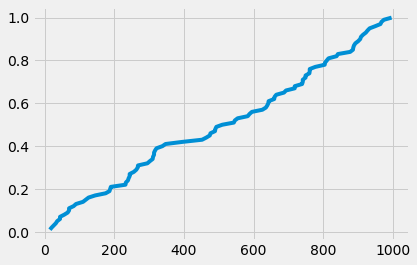

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data= np.random.randint(1, 1000, 100)

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_, y_ = ecdf(data)
plt.plot(x_, y_)
plt.show()

In [0]:
print(np.percentile(data, np.array([10, 25, 50, 90])) )# specifying 10th, 25th, 50th, and 90th percentile

[153.4 304.  480.  881.1]


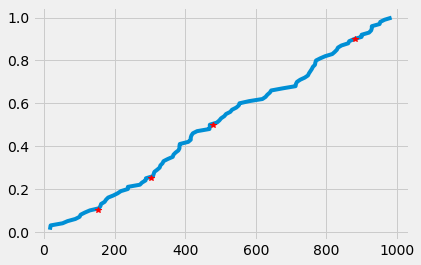

In [0]:
# plotting ecdf with percentiles markers
percentiles=np.array([10, 25, 50, 90])
plt.plot(x_, y_)
plt.plot(np.percentile(data, np.array([10, 25, 50, 90])), percentiles/100, marker='*', color='red', linestyle='none') # we divide y by 100 to limit y values between 0 and 1.
plt.show()

# Normal Distribution

[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is by far the most well-known distribution among all distributions. Most events occur following the properties of normal distribution in nature.

Also, known as Gaussian distribution, normal distribution shows values that are near the mean more frequently  and as the frequency decreases, the further away the individual values are from the mean. To understand the true nature of normal distribution, we need to discuss Central Limit Theorem (CLT). CLT states that as you keep getting independent samples of a random varible, the mean of of each of these samples approximate to normal distribution.


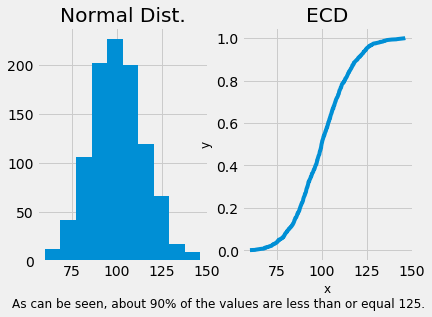

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

data = np.random.normal(100, 15, size=1000)
ecdf_ = ECDF(data)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data)
ax1.set_title('Normal Dist.')
ax2.plot(ecdf_.x, ecdf_.y)
ax2.set_xlabel('x', fontsize=12 )
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('ECD')
txt="As can be seen, about 90% of the values are less than or equal 125."
plt.figtext(0.5, -0.09, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

#Binomial Distribution

Binomial distribution is a discrete probability distribution that models the number of desired outcomes in a sequence of n independent experiments, with probability of success p. A common example is flipping a coin. The probability of getting heads in this case is p=0.5, if the coin is fair. If you flip a fair coin for ten times, you use n=10, p=0.5 as your parameter values. Below, we will simulate a 30-coin-flip with 0.15 probability of heads.We will repeat the experiment 1000 times.


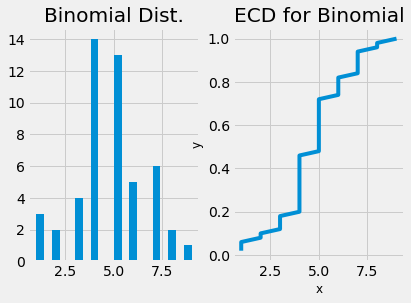

In [42]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
    
data_bin = np.random.binomial(30, 0.15, size=50)
x_, y_ = ecdf(data_bin)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data_bin, bins=20)
ax1.set_title('Binomial Dist.')
ax2.plot(x_, y_)
ax2.set_xlabel('x', fontsize=12 )
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('ECD for Binomial')
plt.show()

#Poisson distribution

The Poisson distribution is a discrete probability distribution, mainly used for count data. It models the number of events occurring in a period, given the average number of times the event happens over the same period. It is particularly useful for events that are time-independent.

<center> $\large P(x) = \Large  \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$ </center>
where X is the number of times an event occurs in a period, and λ is the parameter of the distribution, which controls the shape of the distribution. λ can be any positive number (not necessarily an integer) and is the expected value of the poisson distribution. Higher λ refers to higher probability to larger values; lower λ refers to more probability to smaller values. One can describe λ as the intensity of the Poisson distribution.
 
![alt text](https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

Image: [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)

Some highlights:
- Events occur independently.
- The rate of occurrence is constant.
- The probability of occurrence is proportional with respect to time. For example, it should be twice as likely for an event to occur when it is observed during the twice length of time.

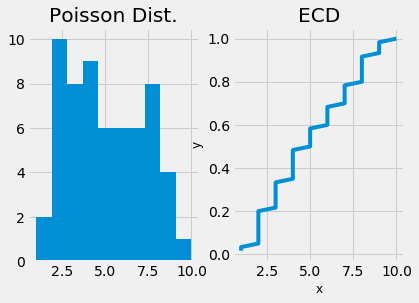

In [47]:
data_poisson= np.random.poisson(5, size =60)
ecdf_ = ECDF(data_poisson)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data_poisson)
ax1.set_title('Poisson Dist.')
ax2.plot(ecdf_.x, ecdf_.y)
ax2.set_xlabel('x', fontsize=12 )
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('ECD')
plt.show()

#The exponential distribution

The exponential distribution is a continuous distribution that is used to measure the expected time for an event to occur or model the time elapsed between events. For example,  For example, the amount of time until an natural disaster occurs or the amount of time an until an employee resigns has an exponential distribution. The difference with the Poisson distribution is that the Poisson distribution analyzes say the number of resignations per given time is modeled with Poisson, but the the time between resignations would be exponential distribution.

<center> $ \large P(X) =\Large \lambda  e^{-\lambda x}$ (The likelihood function) </center>

It can be seen a continuous version of the geometric distribution. Both exponential and geometric distributions are memoryless (the time until a certain event, does not depend on how much time has already elapsed).

It is important to see the connection between poisson process and exponential distributions. For example, the number of customers arriving at a bank in a period is modeled using poisson distribution. We have our λ, the mean number of customers arriving in that period. In Poisson distribution, the discrete random variable X, the number of customers arriving was our focus, while in the exponential distribution, we might be interested in the continuous random variable of the waiting time until the first customer arrives.

Some highlights: 
- describes the waiting times between rare events.
- data occurring at some fixed rate over a period of time
- events occur continuously and independently 
- λ is the average number of occurrences per interval.
- If the number of occurrences in a given period is a Poisson distribution, the time between these occurrences is the exponential distribution.


The exponential distribution is used in reliability research, which examines how long a product will last. Also, simulating waiting times in queques etc.

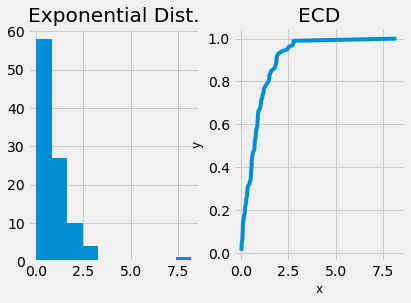

In [48]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=100)
ecdf_ = ECDF(data_expon)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data_expon)
ax1.set_title('Exponential Dist.')
ax2.plot(ecdf_.x, ecdf_.y)
ax2.set_xlabel('x', fontsize=12 )
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('ECD')
plt.show()

There are other distributions (actually there are many) but these ones are maybe the most commonly used in data science. Understanding the nature of the probability distributions are crucial, especially for Bayesian modeling, a topic we will discuss soon.

# **Uniform Distribution**

The uniform distribution is a symmetric probability distribution. In other words,  events defined by the same length intervals are equally probable. This property of all outcomes being equally likely make this distribution desirable for cases we do not have any prior information. Thus, we basically, claim no matter what the actual parameter value is, the probability will be the same for a given interval. The uniform distribution can be both discrete and continuous distribution.

The probability density function: 

$ P(x) = \frac{1}{b - a}$

![alt text](https://docs.pymc.io/_images/continuous-1.png) 

Source: [Pymc.io](https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Uniform)



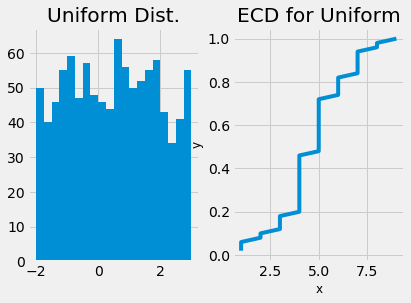

In [49]:
data = np.random.uniform(-2,3,1000)
x_, y_ = ecdf(data_bin)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data, bins=20)
ax1.set_title('Uniform Dist.')
ax2.plot(x_, y_)
ax2.set_xlabel('x', fontsize=12 )
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('ECD for Uniform')
plt.show()

**Sources used and further reading**

1-https://en.wikipedia.org/wiki/Continuous_or_discrete_variable 

2-Bertsekas and Tsitsiklis, [Introduction to Probability,](https://ocw.mit.edu/resources/res-6-012-introduction-to-probability-spring-2018/part-i-the-fundamentals/MITRES_6_012S18_Textbook.pdf)
2nd Edition, Massachusetts Institute of Technology
